In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, encoding="ISO-8859-1")
ride_df = pd.read_csv(ride_data_to_load, encoding="ISO-8859-1")
# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, on='city')
# Display the data table for preview
df = df.sort_values('city')
df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

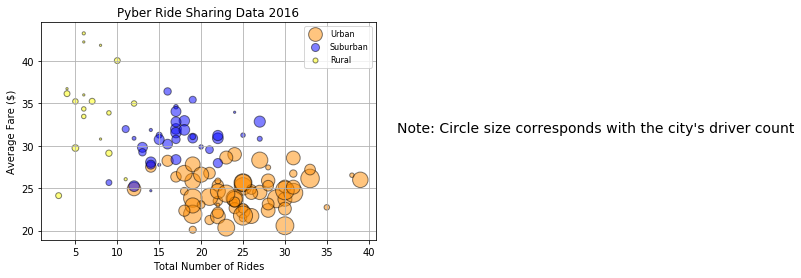

In [9]:
# Obtain the x and y coordinates for each of the three city types
#bycity_df = df.groupby(['city'])

#Loc's the TYPE of city into three different variables
urban_df = df.loc[df["type"] == "Urban", :]
suburban_df = df.loc[df["type"] == "Suburban", :]
rural_df = df.loc[df["type"] == "Rural", :]

#Groups our three new datasets by city
bycity_urban_df = urban_df.groupby(['city'])
bycity_suburban_df = suburban_df.groupby(['city'])
bycity_rural_df = rural_df.groupby(['city'])

#obtains the ridecount
ridecount_urban = urban_df['city'].value_counts().sort_index()
ridecount_rural = rural_df['city'].value_counts().sort_index()
ridecount_suburban = suburban_df['city'].value_counts().sort_index()

#finds average fare by dividing the sum of fares by the ridecount
avg_fare_urban = bycity_urban_df['fare'].sum() / ridecount_urban
avg_fare_suburban = bycity_suburban_df['fare'].sum() / ridecount_suburban
avg_fare_rural = bycity_rural_df['fare'].sum() / ridecount_rural

#Finds driver count by taking the mean of driver counts grouped by city - there should be a better way to do this
driver_count_urban = bycity_urban_df['driver_count'].mean()
driver_count_suburban = bycity_suburban_df['driver_count'].mean()
driver_count_rural = bycity_rural_df['driver_count'].mean()

# Build the scatter plots for each city types
legend_r = plt.scatter(ridecount_urban, avg_fare_urban, marker="o", facecolors="darkorange", edgecolors="black",
            s=driver_count_urban*5, alpha=.5)
legend_b = plt.scatter(ridecount_suburban, avg_fare_suburban, marker="o", facecolors="blue", edgecolors="black",
            s=driver_count_suburban*5, alpha=.5)
legend_y = plt.scatter(ridecount_rural, avg_fare_rural, marker="o", facecolors="yellow", edgecolors="black",
            s=driver_count_rural*5, alpha=.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend (Couldn't figure out how to change the scatterpoint size on the legend)
colors = ['r', 'b', 'y']
plt.legend((legend_r, legend_b, legend_y),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           fontsize=8)

# Incorporate a text label regarding circle size
plt.text(.95, 0.5, "Note: Circle size corresponds with the city's driver count", fontsize=14, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("../Images/PyberGraph.png")
plt.show()


In [10]:
# Show plot
plt.show()

## Total Fares by City Type

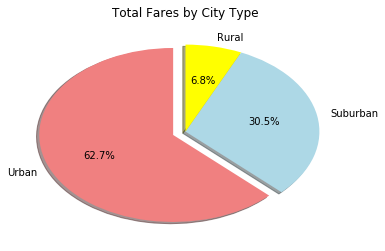

In [11]:
# Calculate Type Percents
fare_urban = urban_df['fare'].sum()
fare_suburban = suburban_df['fare'].sum()
fare_rural = rural_df['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [fare_urban, fare_suburban, fare_rural]

colors = ["lightcoral", "lightblue", "yellow"]

explode = (.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("../Images/TotalFareByType.png")
plt.show()


In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

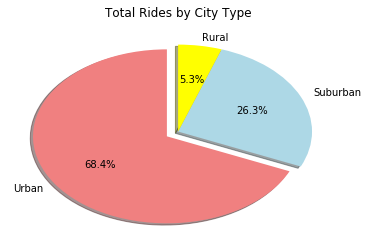

In [13]:
# Calculate Ride Percents
pie_rides_urban = urban_df['city'].count()
pie_rides_suburban = suburban_df['city'].count()
pie_rides_rural = rural_df['city'].count()

# Build Pie Chart
sizes_2 = [pie_rides_urban, pie_rides_suburban, pie_rides_rural]

plt.pie(sizes_2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotalRidesByType.png")
plt.show()


In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

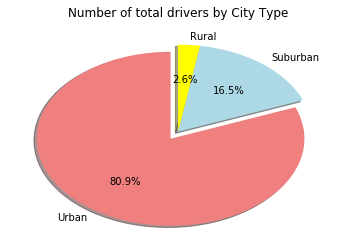

In [15]:
# Calculate Driver Percents
pie_drivers_urban = (bycity_urban_df['driver_count'].sum() / bycity_urban_df['city'].count()).sum()
pie_drivers_rural = (bycity_rural_df['driver_count'].sum() / bycity_rural_df['city'].count()).sum()
pie_drivers_suburban = (bycity_suburban_df['driver_count'].sum() / bycity_suburban_df['city'].count()).sum()

# Build Pie Charts
sizes_3 = [pie_drivers_urban, pie_drivers_suburban, pie_drivers_rural]

plt.pie(sizes_3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Number of total drivers by City Type")

# Save Figure
plt.savefig("../Images/TotalDriversByType.png")
plt.show()

In [16]:
# Show Figure
plt.show()